# Imports

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import mne
import pylsl
import stream_viewer
import PyQt5
import pyxdf

import sys
sys.path.append(r"C:\Users\Jake\App-SigVisualizer-master")

import os
import time
import random
from pylsl import StreamInfo, StreamOutlet, resolve_stream, StreamInlet
import pandas as pd
from mne import Annotations

import fooof
from fooof import FOOOF
from fooof import FOOOFGroup
import numpy as np
import pandas as pd
from mne.time_frequency import psd_array_welch

from IPython.display import display, clear_output

# Basic testing with LSL Stream

In [2]:

from pylsl import resolve_stream

# Find all available streams
streams = resolve_stream()

# Print details of each stream found
for i, stream in enumerate(streams):
    print(f"Stream {i + 1}:")
    print(f"  Name: {stream.name()}")
    print(f"  Type: {stream.type()}")
    print(f"  Source ID: {stream.source_id()}")
    print(f"  Channels: {stream.channel_count()}")
    print(f"  Sampling Rate: {stream.nominal_srate()} Hz")
    print()

inlet = StreamInlet(streams[0])


Stream 1:
  Name: Neuroeducation EEG
  Type: EEG
  Source ID: neuroEdu_JakeTear
  Channels: 19
  Sampling Rate: 250.0 Hz



In [3]:
from PyQt5.QtCore import QThread
class TestThread(QThread):
    def run(self):
        print("Thread running")

thread = TestThread()
thread.start()

Thread running


In [4]:

%gui qt
!python C:\Users\Jake\testing-learning2024\App-SigVisualizer-master\sigvisualizer.py

App running...
Starting new thread...
Resolving streams...
Resolved streams: [<pylsl.pylsl.StreamInfo object at 0x000001A05886E480>]
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 275 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 275 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250 timestamps.
Updating visualization with 250

2024-12-20 16:28:00.514 (   5.787s) [        6F779F05]      netinterfaces.cpp:36    INFO| netif '{283387C3-2199-4EB6-96CE-FB33985E013C}' (status: 2, multicast: 1
2024-12-20 16:28:00.515 (   5.788s) [        6F779F05]      netinterfaces.cpp:36    INFO| netif '{02799E37-8E9E-4D8C-91DA-86B70D29ABDE}' (status: 2, multicast: 1
2024-12-20 16:28:00.515 (   5.788s) [        6F779F05]      netinterfaces.cpp:36    INFO| netif '{B330F737-8CBD-40D8-8076-AB48EAEC7BB9}' (status: 2, multicast: 1
2024-12-20 16:28:00.515 (   5.789s) [        6F779F05]      netinterfaces.cpp:36    INFO| netif '{86EC829D-CC0A-4C41-BAF7-97AB2642BBE2}' (status: 2, multicast: 1
2024-12-20 16:28:00.516 (   5.789s) [        6F779F05]      netinterfaces.cpp:36    INFO| netif '{57C9744B-1F96-43AC-B626-A720FE179FF0}' (status: 1, multicast: 1
2024-12-20 16:28:00.516 (   5.789s) [        6F779F05]      netinterfaces.cpp:58    INFO| 	IPv6 ifindex 9
2024-12-20 16:28:00.516 (   5.789s) [        6F779F05]      netinterfaces.cpp:36    

### something else --


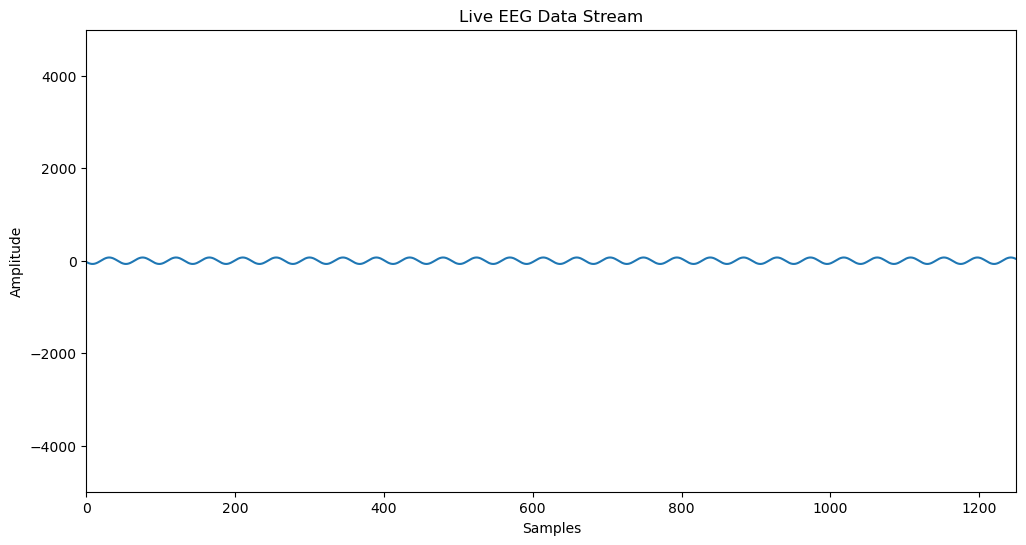

1


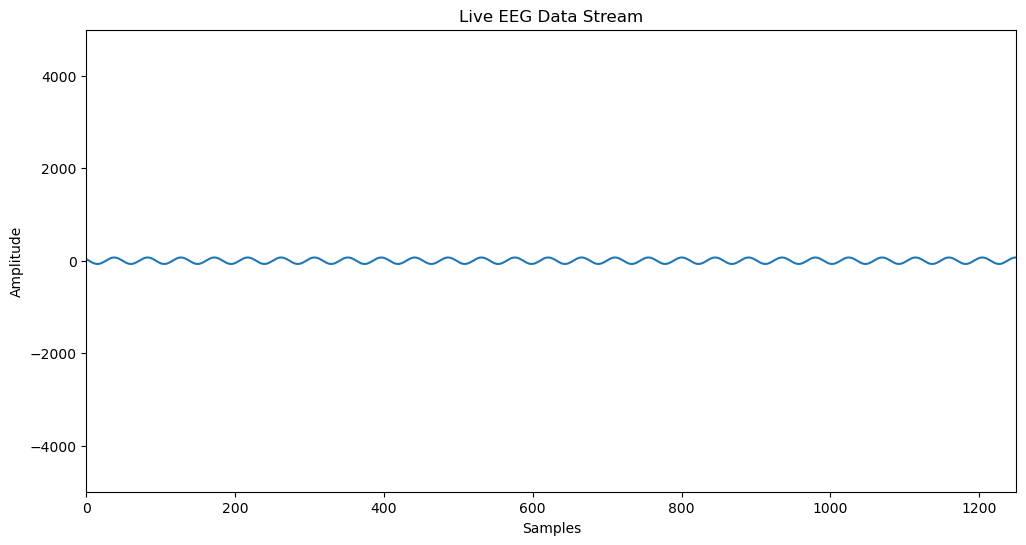

2


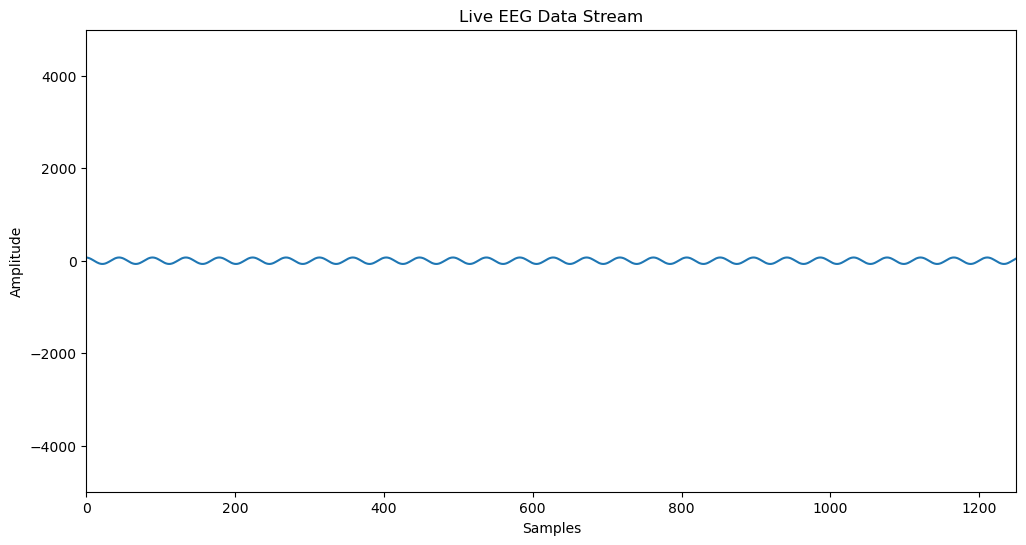

3
Streaming stopped.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time
from pylsl import StreamInlet, resolve_stream

# Resolve and open the LSL stream
streams = resolve_stream()
inlet = StreamInlet(streams[0])

# Parameters
sampling_rate = 250  # samples per second
window_length = 5    # seconds
buffer_size = sampling_rate * window_length  # 1280 samples for 5 seconds at 256 Hz

# Buffer for holding the last 5 seconds of data
data_buffer = np.zeros(buffer_size)

# Set up the plot
start_time = time.time()
elapsed_time = time.time() - start_time

x = 0
try:
    while True:

        time.sleep(max(0, 5.0 - elapsed_time))
        # Pull samples for 1 second
        new_data = []
        for _ in range(buffer_size):  # 256 samples per second
            sample, _ = inlet.pull_sample()
            new_data.append(sample[0])  # Assuming single-channel data; adjust for multi-channel

        # Update the buffer with new data, shifting older data out
        data_buffer = np.roll(data_buffer, -buffer_size)
        data_buffer[-buffer_size:] = np.array(new_data).flatten()
        fig, ax = plt.subplots(figsize=(12, 6))
        line, = ax.plot(data_buffer)
        ax.set_ylim(-5000, 5000)  # Adjust y-axis limits as needed based on signal range
        ax.set_title("Live EEG Data Stream")
        ax.set_xlabel("Samples")
        ax.set_ylabel("Amplitude")
        # Update the plot with the new buffer data
        line.set_ydata(data_buffer)

        ax.set_xlim(0, buffer_size)  # Adjust the x-axis range
        plt.pause(0.001)  # Small pause to update the plot

        # Maintain a 1-second loop interval
        elapsed_time = time.time() - start_time
        x = x+1
        print(x)
        

except KeyboardInterrupt:
    print("Streaming stopped.")

# Close plot on exit
plt.show()


# Testing labrecorder / mne workflow!

In [46]:
info = StreamInfo(name='MarkerStream', type='Markers', channel_count=1, nominal_srate=0, channel_format='string')
outlet = StreamOutlet(info)

# Find all available streams
streams = resolve_stream()

inlet = StreamInlet(streams[0])

# Print details of each stream found
for i, stream in enumerate(streams):
    print(f"Stream {i + 1}:")
    print(f"  Name: {stream.name()}")
    print(f"  Type: {stream.type()}")
    print(f"  Source ID: {stream.source_id()}")
    print(f"  Channels: {stream.channel_count()}")
    print(f"  Sampling Rate: {stream.nominal_srate()} Hz")
    print()

Stream 1:
  Name: MarkerStream
  Type: Markers
  Source ID: 
  Channels: 1
  Sampling Rate: 0.0 Hz

Stream 2:
  Name: Neuroeducation EEG
  Type: EEG
  Source ID: neuroEdu_JakeTear
  Channels: 19
  Sampling Rate: 250.0 Hz



In [10]:


# Send test markers
print("Sending test markers to the marker stream...")
for i in range(5):
    marker = f"TestMarker_{i+1}"
    outlet.push_sample([marker])
    print(f"Sent: {marker}")
    time.sleep(1)  # Wait 1 second between markers


Sending test markers to the marker stream...
Sent: TestMarker_1
Sent: TestMarker_2
Sent: TestMarker_3
Sent: TestMarker_4
Sent: TestMarker_5


### analysis part

In [ ]:
from pyxdf import load_xdf

# Load the XDF file
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))
xdf_file = os.path.join(project_directory, "EMAData", "Test1.xdf")
streams, header = load_xdf(xdf_file)


# Print the streams and check for the marker stream
for stream in streams:
    print(f"Stream Name: {stream['info']['name'][0]}")
    print(f"Stream Type: {stream['info']['type'][0]}")
    if stream['info']['type'][0] == 'Markers':
        print("Markers in the Marker stream:")
        for marker, timestamp in zip(stream['time_series'], stream['time_stamps']):
            print(f"  Marker: {marker[0]} at {timestamp:.5f}")


Stream Name: MarkerStream
Stream Type: Markers
Markers in the Marker stream:
  Marker: TestMarker_1 at 1299528.68601
  Marker: TestMarker_2 at 1299529.68731
  Marker: TestMarker_3 at 1299530.68843
  Marker: TestMarker_4 at 1299531.68954
  Marker: TestMarker_5 at 1299532.69020
Stream Name: Neuroeducation EEG
Stream Type: EEG


In [42]:
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety"))

streams, header = pyxdf.load_xdf(os.path.join(project_directory, r"EMAData", r"Test1.xdf"))
eeg_stream = next((s for s in streams if s['info']['type'][0] == 'EEG'), None)
eeg_data = np.array(eeg_stream['time_series']).T  # Transpose to channels x samples
sfreq = float(eeg_stream['info']['nominal_srate'][0])  # Sampling frequency
ch_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']  # Channel names
ch_names = [ch['label'][0] for ch in ch_names]

print(eeg_data)
print(sfreq)
print(ch_names)

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

raw_eeg_data = mne.io.RawArray(eeg_data, info)
raw_eeg_data.rename_channels({ch: ch.capitalize() for ch in raw_eeg_data.ch_names})
    # Add standard montage (10-20 system)
montage = mne.channels.make_standard_montage('standard_1020')
raw_eeg_data.set_montage(montage)
raw_eeg_data.plot(title="Resting State EEG (Eyes Closed)", scalings='auto')

[[-21.97799704 -31.03703751 -39.48874499 ... -47.20554681 -53.95637456
  -59.65138355]
 [-49.09486563 -55.74706724 -61.24529353 ...  48.28789524  55.06057603
   60.69349226]
 [-66.09546692 -68.77214688 -69.94518952 ... -49.34865272 -56.12996382
  -61.68404671]
 ...
 [-68.49372204 -69.99948759 -68.6022431  ... -61.68542776 -67.10983657
  -69.75107468]
 [-67.82217799 -62.78267962 -55.03672982 ...  62.37128763  67.58913404
   69.89333146]
 [-53.17550142 -42.40621168 -29.73814478 ... -63.02925969 -68.02569638
  -69.97621943]]
250.0
['Fp1', 'Fp2', 'F7', 'F8', 'F3', 'F4', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz']
Creating RawArray with float64 data, n_channels=19, n_times=2250
    Range : 0 ... 2249 =      0.000 ...     8.996 secs
Ready.


In [ ]:
from mne import Annotations

marker_stream = next(s for s in streams if s['info']['type'][0] == 'Markers')

markers = [m[0] for m in marker_stream['time_series']]
marker_timestamps = marker_stream['time_stamps']


# Align marker timestamps with the EEG recording
annotations = Annotations(
    onset=marker_timestamps - eeg_timestamps[0],  # Align to EEG start time
    duration=[0] * len(marker_timestamps),       # Markers are instantaneous
    description=markers                          # Marker descriptions
)

# Add annotations to the Raw object
raw_eeg_data.set_annotations(annotations)

raw_eeg_data.plot(title="Resting State EEG (Eyes Closed)", scalings='auto')

In [45]:
from mne import events_from_annotations, Epochs

# Step 1: Convert Annotations to Events
events, event_id = events_from_annotations(raw_eeg_data)
print("Events:", events)
print("Event IDs:", event_id)

# Step 2: Define Epoch Parameters
tmin = -0.5  # Start 0.5 seconds before the marker
tmax = 0.0   # End at the marker time

# Step 3: Create Epochs
epochs = Epochs(raw_eeg_data, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

# Step 4: Visualize Epochs
epochs.plot(scalings='auto')

Used Annotations descriptions: ['TestMarker_1', 'TestMarker_2', 'TestMarker_3', 'TestMarker_4', 'TestMarker_5']
Events: [[ 535    0    1]
 [ 785    0    2]
 [1036    0    3]
 [1286    0    4]
 [1536    0    5]]
Event IDs: {'TestMarker_1': 1, 'TestMarker_2': 2, 'TestMarker_3': 3, 'TestMarker_4': 4, 'TestMarker_5': 5}
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5 events and 126 original time points ...
0 bad epochs dropped


Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


# Testing the actual experiment

## before recording from labrecorder, run this!:

In [55]:
import time
import random
import json
from pylsl import StreamInfo, StreamOutlet, resolve_stream, StreamInlet

# Create the marker stream
info = StreamInfo(name='MarkerStream', type='Markers', channel_count=1, nominal_srate=0, channel_format='string')
outlet = StreamOutlet(info)

# Find all available streams
streams = resolve_stream()

inlet = StreamInlet(streams[0])

# Print details of each stream found
for i, stream in enumerate(streams):
    print(f"Stream {i + 1}:")
    print(f"  Name: {stream.name()}")
    print(f"  Type: {stream.type()}")
    print(f"  Source ID: {stream.source_id()}")
    print(f"  Channels: {stream.channel_count()}")
    print(f"  Sampling Rate: {stream.nominal_srate()} Hz")
    print()

Stream 1:
  Name: MarkerStream
  Type: Markers
  Source ID: 
  Channels: 1
  Sampling Rate: 0.0 Hz

Stream 2:
  Name: Neuroeducation EEG
  Type: EEG
  Source ID: neuroEdu_JakeTear
  Channels: 19
  Sampling Rate: 250.0 Hz



Channels marked as bad:
none


## while recording

In [56]:

# Momentary assessment paradigm
try:
    for count in range(1, 3):  # Run exactly 2 times
        # Wait for a random interval between 15 and 20 seconds
        interval = random.uniform(15, 20)
        time.sleep(interval)

        # Send a marker
        marker_name = f"Marker_{count}"
        metadata = json.dumps({"marker": marker_name})
        outlet.push_sample([metadata])
        print(f"Sent initial marker: {metadata}")

        # Prompt the user for input
        print(f"Marker: {marker_name} - Please input a number (1-10):")

        # Validate user input
        while True:
            try:
                user_input = int(input())
                if 1 <= user_input <= 10:
                    break
                else:
                    print("Please enter a valid number between 1 and 10.")
            except ValueError:
                print("Invalid input. Please enter a number between 1 and 10.")

        # Send an update tied to the original marker
        update_metadata = json.dumps({"marker update": marker_name, "user input": user_input})
        outlet.push_sample([update_metadata])
        print(f"Sent update tied to marker: {update_metadata}\n")

except KeyboardInterrupt:
    print("Momentary assessment paradigm terminated.")


Sent initial marker: {"marker": "Marker_1"}
Marker: Marker_1 - Please input a number (1-10):
Sent update tied to marker: {"marker update": "Marker_1", "user input": 5}

Sent initial marker: {"marker": "Marker_2"}
Marker: Marker_2 - Please input a number (1-10):
Sent update tied to marker: {"marker update": "Marker_2", "user input": 10}



## analysis

In [4]:
from pyxdf import load_xdf

# Load the XDF file
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))
xdf_file = os.path.join(project_directory, "EMAData", "Test2.xdf")
streams, header = load_xdf(xdf_file)


# Print the streams and check for the marker stream
for stream in streams:
    print(f"Stream Name: {stream['info']['name'][0]}")
    print(f"Stream Type: {stream['info']['type'][0]}")
    if stream['info']['type'][0] == 'Markers':
        print("Markers in the Marker stream:")
        for marker, timestamp in zip(stream['time_series'], stream['time_stamps']):
            print(f"  Marker: {marker[0]} at {timestamp:.5f}")


Stream Name: Neuroeducation EEG
Stream Type: EEG
Stream Name: MarkerStream
Stream Type: Markers
Markers in the Marker stream:
  Marker: {"marker": "Marker_1"} at 1626945.09124
  Marker: {"marker update": "Marker_1", "user input": 5} at 1626958.56051
  Marker: {"marker": "Marker_2"} at 1626978.03069
  Marker: {"marker update": "Marker_2", "user input": 10} at 1626986.38199


In [16]:
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))

streams, header = pyxdf.load_xdf(os.path.join(project_directory, r"EMAData", r"Test2.xdf"))


#raw EEG data object
eeg_stream = next((s for s in streams if s['info']['type'][0] == 'EEG'), None)
eeg_data = np.array(eeg_stream['time_series']).T  # Transpose to channels x samples
sfreq = float(eeg_stream['info']['nominal_srate'][0])  # Sampling frequency
ch_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']  # Channel names
ch_names = [ch['label'][0] for ch in ch_names]

print(eeg_data)
print(sfreq)
print(ch_names)

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

raw_eeg_data = mne.io.RawArray(eeg_data, info)
raw_eeg_data.rename_channels({ch: ch.capitalize() for ch in raw_eeg_data.ch_names})
    # Add standard montage (10-20 system)
montage = mne.channels.make_standard_montage('standard_1020')
raw_eeg_data.set_montage(montage)

#adding markers
marker_stream = next(s for s in streams if s['info']['type'][0] == 'Markers')

markers = [m[0] for m in marker_stream['time_series']]
marker_timestamps = marker_stream['time_stamps']

eeg_timestamps = eeg_stream['time_stamps']

# Align marker timestamps with the EEG recording
annotations = Annotations(
    onset=marker_timestamps - eeg_timestamps[0],  # Align to EEG start time
    duration=[0] * len(marker_timestamps),       # Markers are instantaneous
    description=markers                          # Marker descriptions
)

# Add annotations to the Raw EEG object
raw_eeg_data.set_annotations(annotations)

raw_eeg_data.plot(title="raw data with markers", scalings='auto')

[[-36.34058313 -44.33358008 -51.45905718 ... -69.13734062 -69.98969801
  -69.47249653]
 [ 49.47496003  41.85663113  33.37186233 ...  13.72790945  23.4359588
   32.65887979]
 [ 59.86079745  64.55716466  67.84205082 ...  59.60557494  53.54159915
   46.30698767]
 ...
 [ 66.29959147  69.47453933  69.76824783 ... -50.37257558 -59.17517089
  -65.52366096]
 [ -6.05509417   8.47647585  22.64263888 ... -28.09572595 -14.25034699
    0.20934038]
 [-69.17816076 -65.37901798 -58.65246948 ...  69.88041726  69.17651582
   65.3751722 ]]
250.0
['Fp1', 'Fp2', 'F7', 'F8', 'F3', 'F4', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz']
Creating RawArray with float64 data, n_channels=19, n_times=16525
    Range : 0 ... 16524 =      0.000 ...    66.096 secs
Ready.


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none


In [15]:
from mne import events_from_annotations, Epochs

# Step 1: Convert Annotations to Events and filter
annotations = raw_eeg_data.annotations

# Dynamically create `event_id` for all "marker" annotations
event_id = {
    desc: idx + 1
    for idx, desc in enumerate(annotations.description)
    if '"marker":' in desc
}

print("Dynamic Event IDs:", event_id)


events, event_id = events_from_annotations(raw_eeg_data, event_id = event_id)
print("Events:", events)
print("Event IDs:", event_id)

#marker_event_ids = [event_id[key] for key in event_id if '"marker":' in key]
#print("Filtered Event IDs:", marker_event_ids)

# Step 2: Define Epoch Parameters
tmin = -4.0  # Start 4 seconds before the marker
tmax = 0.0   # End at the marker time

# Step 3: Create Epochs
epochs = Epochs(raw_eeg_data, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

# Step 4: Visualize Epochs
epochs.plot(title="epochs -4s to 0s (marker onset)", scalings='auto')



Dynamic Event IDs: {'{"marker": "Marker_1"}': 1, '{"marker": "Marker_2"}': 3}
Used Annotations descriptions: ['{"marker": "Marker_1"}', '{"marker": "Marker_2"}']
Events: [[ 4028     0     1]
 [12263     0     3]]
Event IDs: {'{"marker": "Marker_1"}': 1, '{"marker": "Marker_2"}': 3}
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2 events and 1001 original time points ...
0 bad epochs dropped


### the whole analysis shebang in one go

In [55]:
import os
import numpy as np
import pandas as pd
from mne import Annotations, events_from_annotations, Epochs
from mne.time_frequency import psd_array_welch
from fooof import FOOOFGroup
import json
from pyxdf import load_xdf

# Load the XDF file
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))
xdf_file = os.path.join(project_directory, "EMAData", "Test2.xdf")
streams, header = load_xdf(xdf_file)

# Extract EEG data stream
eeg_stream = next((s for s in streams if s['info']['type'][0] == 'EEG'), None)
eeg_data = np.array(eeg_stream['time_series']).T  # Transpose to channels x samples
sfreq = float(eeg_stream['info']['nominal_srate'][0])  # Sampling frequency
ch_names = [ch['label'][0] for ch in eeg_stream['info']['desc'][0]['channels'][0]['channel']]

# Create MNE Raw object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw_eeg_data = mne.io.RawArray(eeg_data, info)
montage = mne.channels.make_standard_montage('standard_1020')
raw_eeg_data.set_montage(montage)

# Extract Marker Stream and Add Annotations
marker_stream = next((s for s in streams if s['info']['type'][0] == 'Markers'), None)
markers = [m[0] for m in marker_stream['time_series']]
marker_timestamps = marker_stream['time_stamps']

# Align markers with EEG timestamps
eeg_timestamps = eeg_stream['time_stamps']
annotations = Annotations(
    onset=marker_timestamps - eeg_timestamps[0],
    duration=[0] * len(marker_timestamps),
    description=markers
)
raw_eeg_data.set_annotations(annotations)

# Separate "marker" and "marker update" annotations
initial_markers = []
update_markers = []

for desc, onset in zip(annotations.description, annotations.onset):
    metadata = json.loads(desc)
    if "marker update" in metadata:
        update_markers.append((metadata["marker update"], metadata.get("user input", None), onset))
    elif "marker" in metadata:
        initial_markers.append((metadata["marker"], onset))

# Map initial markers to updates
marker_mapping = {name: user_input for name, user_input, _ in update_markers}

# Filter only initial markers that have a corresponding update
filtered_events = [
    [int(onset * raw_eeg_data.info['sfreq']), 0, idx + 1]
    for idx, (name, onset) in enumerate(initial_markers)
    if name in marker_mapping
]

# Create event ID dynamically
event_id = {name: idx + 1 for idx, (name, _) in enumerate(initial_markers) if name in marker_mapping}

# Convert filtered events to MNE Events
events = np.array(filtered_events)

# Create Epochs
tmin, tmax = -4.0, 0.0  # Define epoch time window
epochs = Epochs(raw_eeg_data, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

# Process each epoch to calculate aperiodic exponent and map to user input
results = []

for epoch_idx, (epoch, event) in enumerate(zip(epochs.get_data(), epochs.events)):
    try:
        # Compute PSD
        psd, freqs = psd_array_welch(epoch, fmin=1, fmax=50, sfreq=epochs.info['sfreq'], average='mean')

        # Fit FOOOFGroup to extract aperiodic exponents
        fg = FOOOFGroup(peak_width_limits=(2, 8))
        fg.fit(freqs, psd)
        aperiodic_exponents = [aperiodic_params[1] for aperiodic_params in fg.get_params('aperiodic_params')]
        avg_aperiodic_exponent = np.mean(aperiodic_exponents)

        # Match the marker name to its user input
        event_marker = list(event_id.keys())[list(event_id.values()).index(event[2])]
        user_input = marker_mapping.get(event_marker, None)

        # Append results
        results.append({
            "Epoch Index": epoch_idx,
            "Marker Name": event_marker,
            "User Input": user_input,
            "Average Aperiodic Exponent": avg_aperiodic_exponent
        })
    except Exception as e:
        print(f"Error processing epoch {epoch_idx}: {e}")

# Convert results to DataFrame
df = pd.DataFrame(results)

# Display or save the DataFrame
print(df)


Creating RawArray with float64 data, n_channels=19, n_times=16525
    Range : 0 ... 16524 =      0.000 ...    66.096 secs
Ready.
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2 events and 1001 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.024 (s)
Running FOOOFGroup across 19 power spectra.
   Epoch Index Marker Name  User Input  Average Aperiodic Exponent
0            0    Marker_1           5                    1.289552
1            1    Marker_2          10                    1.289665


### This does it but based on when the user actually presses enter instead of the initial marker send.

In [ ]:
import os
import numpy as np
import pandas as pd
from mne import Annotations, events_from_annotations, Epochs
from mne.time_frequency import psd_array_welch
from fooof import FOOOFGroup
import json
from pyxdf import load_xdf

# Load the XDF file
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))
xdf_file = os.path.join(project_directory, "EMAData", "Test2.xdf")
streams, header = load_xdf(xdf_file)

# Extract EEG data stream
eeg_stream = next((s for s in streams if s['info']['type'][0] == 'EEG'), None)
#print((np.array(eeg_stream['time_series']).shape))
eeg_data = np.array(eeg_stream['time_series']).T  # Transpose to channels x samples
sfreq = float(eeg_stream['info']['nominal_srate'][0])  # Sampling frequency
ch_names = [ch['label'][0] for ch in eeg_stream['info']['desc'][0]['channels'][0]['channel']]

# Create MNE Raw object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw_eeg_data = mne.io.RawArray(eeg_data, info)
montage = mne.channels.make_standard_montage('standard_1020')
raw_eeg_data.set_montage(montage)

# Extract Marker Stream and Add Annotations
marker_stream = next((s for s in streams if s['info']['type'][0] == 'Markers'), None)
markers = [m[0] for m in marker_stream['time_series']]
marker_timestamps = marker_stream['time_stamps']

# Align markers with EEG timestamps
eeg_timestamps = eeg_stream['time_stamps']
annotations = Annotations(
    onset=marker_timestamps - eeg_timestamps[0],
    duration=[0] * len(marker_timestamps),
    description=markers
)
raw_eeg_data.set_annotations(annotations)

# Filter only "marker update" annotations
update_markers = []

for desc, onset in zip(annotations.description, annotations.onset):
    metadata = json.loads(desc)
    if "marker update" in metadata:
        update_markers.append((metadata["marker update"], metadata.get("user input", None), onset))

# Create events based on "marker update" annotations
event_id = {name: idx + 1 for idx, (name, _, _) in enumerate(update_markers)}
filtered_events = [
    [int(onset * raw_eeg_data.info['sfreq']), 0, event_id[name]]
    for name, _, onset in update_markers
]

# Convert filtered events to MNE Events
events = np.array(filtered_events)

# Create Epochs
tmin, tmax = -4.0, 0.0  # Define epoch time window
epochs = Epochs(raw_eeg_data, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

# Process each epoch to calculate aperiodic exponent and map to user input
results = []

for epoch_idx, (epoch, event) in enumerate(zip(epochs.get_data(), epochs.events)):
    try:
        # Compute PSD
        psd, freqs = psd_array_welch(epoch, fmin=1, fmax=50, sfreq=epochs.info['sfreq'], average='mean')

        # Fit FOOOFGroup to extract aperiodic exponents
        fg = FOOOFGroup(peak_width_limits=(2, 8))
        fg.fit(freqs, psd)
        aperiodic_exponents = [aperiodic_params[1] for aperiodic_params in fg.get_params('aperiodic_params')]
        avg_aperiodic_exponent = np.mean(aperiodic_exponents)

        # Match the marker name to its user input
        event_marker = list(event_id.keys())[list(event_id.values()).index(event[2])]
        user_input = next(
            (input_value for name, input_value, _ in update_markers if name == event_marker),
            None
        )

        # Append results
        results.append({
            "Epoch Index": epoch_idx,
            "Marker Name": event_marker,
            "User Input": user_input,
            "Average Aperiodic Exponent": avg_aperiodic_exponent
        })
    except Exception as e:
        print(f"Error processing epoch {epoch_idx}: {e}")

# Convert results to DataFrame
df = pd.DataFrame(results)

# Display or save the DataFrame
print(df)


(16525, 19)
Creating RawArray with float64 data, n_channels=19, n_times=16525
    Range : 0 ... 16524 =      0.000 ...    66.096 secs
Ready.
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2 events and 1001 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.024 (s)
Running FOOOFGroup across 19 power spectra.
   Epoch Index Marker Name  User Input  Average Aperiodic Exponent
0            0    Marker_1           5                    1.349396
1            1    Marker_2          10                    1.346805


## a test of scaling this analysis up

In [62]:
import os
import numpy as np
import pandas as pd
from mne import Annotations, events_from_annotations, Epochs
from mne.time_frequency import psd_array_welch
from fooof import FOOOFGroup
import json
from pyxdf import load_xdf

# Directory containing the .xdf files
project_directory = os.path.dirname(os.path.abspath("EMA-anxiety-test"))
data_directory = os.path.join(project_directory, "EMAData")

# Create a list of all .xdf files in the directory
xdf_files = [f for f in os.listdir(data_directory) if f.endswith(".xdf")]

# Initialize a list to store results for all subjects
all_subjects_results = []

# Process each .xdf file
for xdf_file in xdf_files:
    # Extract the subject ID from the filename
    subject_id = os.path.splitext(xdf_file)[0]

    print(f"Processing file: {xdf_file} for subject: {subject_id}")

    # Load the XDF file
    streams, header = load_xdf(os.path.join(data_directory, xdf_file))

    # Extract EEG data stream
    eeg_stream = next((s for s in streams if s['info']['type'][0] == 'EEG'), None)
    eeg_data = np.array(eeg_stream['time_series']).T  # Transpose to channels x samples
    sfreq = float(eeg_stream['info']['nominal_srate'][0])  # Sampling frequency
    ch_names = [ch['label'][0] for ch in eeg_stream['info']['desc'][0]['channels'][0]['channel']]

    # Create MNE Raw object
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    raw_eeg_data = mne.io.RawArray(eeg_data, info)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw_eeg_data.set_montage(montage)

    # Extract Marker Stream and Annotations
    marker_stream = next((s for s in streams if s['info']['type'][0] == 'Markers'), None)
    markers = [m[0] for m in marker_stream['time_series']]
    marker_timestamps = marker_stream['time_stamps']
    eeg_timestamps = eeg_stream['time_stamps']

    annotations = Annotations(
        onset=marker_timestamps - eeg_timestamps[0],
        duration=[0] * len(marker_timestamps),
        description=markers
    )
    raw_eeg_data.set_annotations(annotations)

    # Filter only "marker update" annotations
    update_markers = [
        (json.loads(desc).get("marker update"), json.loads(desc).get("user input"), onset)
        for desc, onset in zip(annotations.description, annotations.onset)
        if "marker update" in json.loads(desc)
    ]

    # Create events based on "marker update" annotations
    event_id = {name: idx + 1 for idx, (name, _, _) in enumerate(update_markers)}
    filtered_events = [
        [int(onset * raw_eeg_data.info['sfreq']), 0, event_id[name]]
        for name, _, onset in update_markers
    ]
    events = np.array(filtered_events)

    # Create Epochs
    tmin, tmax = -4.0, 0.0  # Define epoch time window
    epochs = Epochs(raw_eeg_data, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

    # Process each epoch to calculate aperiodic exponent and map to user input
    subject_results = []
    for epoch_idx, (epoch, event) in enumerate(zip(epochs.get_data(), epochs.events)):
        try:
            # Compute PSD
            psd, freqs = psd_array_welch(epoch, fmin=1, fmax=50, sfreq=epochs.info['sfreq'], average='mean')

            # Fit FOOOFGroup to extract aperiodic exponents
            fg = FOOOFGroup(peak_width_limits=(2, 8))
            fg.fit(freqs, psd)
            aperiodic_exponents = [aperiodic_params[1] for aperiodic_params in fg.get_params('aperiodic_params')]
            avg_aperiodic_exponent = np.mean(aperiodic_exponents)

            # Match the marker name to its user input
            event_marker = list(event_id.keys())[list(event_id.values()).index(event[2])]
            user_input = next(
                (input_value for name, input_value, _ in update_markers if name == event_marker),
                None
            )

            # Append results for this epoch
            subject_results.append({
                "Subject ID": subject_id,
                "Epoch Index": epoch_idx,
                "Marker Name": event_marker,
                "Anxiety Rating": user_input,
                "Average Aperiodic Exponent": avg_aperiodic_exponent
            })
        except Exception as e:
            print(f"Error processing epoch {epoch_idx} for subject {subject_id}: {e}")

    # Save subject's results to all results
    all_subjects_results.extend(subject_results)

    # Optionally save individual subject results to a CSV
    subject_df = pd.DataFrame(subject_results)

# Combine all results into a single DataFrame
all_results_df = pd.DataFrame(all_subjects_results)

# Display the combined results
all_results_df.head()


Processing file: Test2.xdf for subject: Test2
Creating RawArray with float64 data, n_channels=19, n_times=16525
    Range : 0 ... 16524 =      0.000 ...    66.096 secs
Ready.
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2 events and 1001 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s)
Running FOOOFGroup across 19 power spectra.
Effective window size : 1.024 (s)
Running FOOOFGroup across 19 power spectra.


,Subject ID,Epoch Index,Marker Name,Anxiety Rating,Average Aperiodic Exponent
0,Test2,0,Marker_1,5,1.349396
1,Test2,1,Marker_2,10,1.346805
